In [1]:
from qoqo_strawberry_fields import StrawberryFieldsBackend
from qoqo import operations, Circuit
import numpy as np
import matplotlib.pyplot as plt
from qoqo_phoquant import unitary_to_ops
from qoqo_phoquant import molecule as mol
from qoqo_phoquant import spectrum_helpers as sh

2024-03-01 14:52:55.249770: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 14:52:55.251880: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 14:52:55.278827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 14:52:55.278852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 14:52:55.279657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Load chemistry data and make a "molecule"

In [2]:
h2o = mol('../src/data/H2O_ion.json')

Decompose interferometers into elementary operations

In [4]:
ops1 = unitary_to_ops(h2o.U1)

The interferometer matrix is unitary
3
[[-6.66909869e-01  4.64601273e-18 -7.45138394e-01]
 [ 7.45138394e-01 -7.26592981e-17 -6.66909869e-01]
 [ 5.72397044e-17  1.00000000e+00 -4.49952805e-17]]
PhaseShift { mode: 0, phase: Float(3.141592653589793) }
PhaseShift { mode: 1, phase: Float(3.141592653589793) }
PhaseShift { mode: 2, phase: Float(3.141592653589793) }
BeamSplitter { mode_0: 1, mode_1: 2, theta: Float(-1.5707963267948966), phi: Float(0.0) }
BeamSplitter { mode_0: 0, mode_1: 1, theta: Float(-0.8407423328877764), phi: Float(0.0) }


In [5]:
ops2 = unitary_to_ops(h2o.U2)

The interferometer matrix is unitary
3
[[-6.95581677e-01  7.18447027e-01 -7.04076637e-17]
 [-0.00000000e+00 -9.79997982e-17 -1.00000000e+00]
 [-7.18447027e-01 -6.95581677e-01  6.81668639e-17]]
BeamSplitter { mode_0: 0, mode_1: 1, theta: Float(0.8015671126079235), phi: Float(0.0) }
PhaseShift { mode: 0, phase: Float(3.141592653589793) }
BeamSplitter { mode_0: 1, mode_1: 2, theta: Float(-1.5707963267948966), phi: Float(0.0) }
PhaseShift { mode: 1, phase: Float(3.141592653589793) }


Perform GBS sampling

In [ ]:
# Sample
nshots = 1000
cir, sam = sh.mol_GBS(squeezing=h2o.s, displ=h2o.alpha, ops1=ops1, ops2=ops2, shots=nshots)

Save circuit as .yaml

In [ ]:
sh.save_circuit(circuit=cir, name="H2O_ion_cir")

Convert samples to energies

In [ ]:
ener = sh.energy_for_samples(sam, h2o.freq_ini, h2o.freq_fin, h2o.E_vertical)

Plot the spectrum as histogram

(array([829.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 121.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-572.155 , -474.5287, -376.9024, -279.2761, -181.6498,  -84.0235,
          13.6028,  111.2291,  208.8554,  306.4817,  404.108 ,  501.7343,
         599.3606,  696.9869,  794.6132,  892.2395,  989.8658, 1087.4921,
        1185.1184, 1282.7447, 1380.371 , 1477.9973, 1575.6236, 1673.2499,
        1770.8762, 186

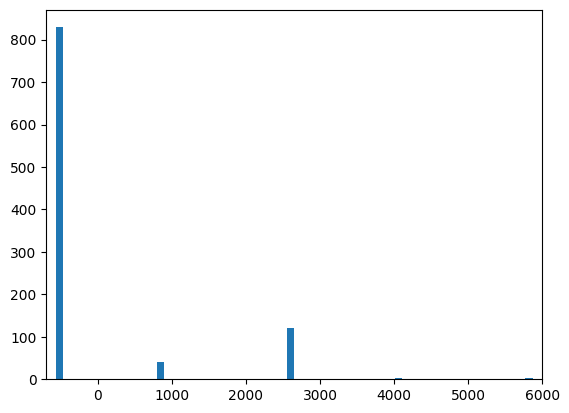

In [28]:
# Plot
n_bins = 100
plt.xlim(-700,6000)
plt.hist(ener, bins=n_bins)